# Semi-Supervised Deep Learning for Melanoma Detection

## Workflow

* Setting up your development environment (GPU will only be used/activated if performance requires it)
* Write “Hello World” of deep learning: train a handwritten digit classifier using PyTorch( > 95 % accuracy ) . 

### CODE: Imports for the notebook

In [1]:
import time
import torch
import torchvision
import numpy
import matplotlib.pyplot as plt
from IPython.core.display import HTML # just to format some outputs 

import google.colab   # Accessing and Saving data, I hope

### CODE: Constants

In [2]:
BASE_DIR = '/content/drive/My Drive/05_Colab'  # Dont' forget to "Mount" drive


### CODE: Functions

In [3]:
 ### Currently none in use

### CODE: Load Data

In [4]:
transform = torchvision.transforms.Compose([
      torchvision.transforms.ToTensor(),
      torchvision.transforms.Normalize((0.5), (0.5))])

trainData = torchvision.datasets.MNIST(root = BASE_DIR, train = True, transform = transform, download = False)

testData = torchvision.datasets.MNIST(root = BASE_DIR, train = False, transform = transform, download = False)

trainLoader = torch.utils.data.DataLoader(trainData, batch_size=64, shuffle=True)
testLoader = torch.utils.data.DataLoader(testData, batch_size=64, shuffle=True)

### CODE: Data Exploration


Images Info:
torch.Size([64, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])

Labels Info:
torch.Size([64])
tensor(5)


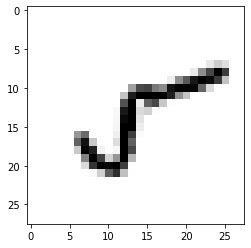

In [5]:
dataIter = iter(trainLoader)
images, labels  = dataIter.next()

print('\nImages Info:')
print(images.shape)
print(images[0].shape)
print(images[0][0].shape)

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

print('\nLabels Info:')
print(labels.shape)
print(labels[0])


### CODE: Setup Network ( 784 -> 128 -> 64 -> 10)

In [6]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = torch.nn.Sequential(torch.nn.Linear(input_size, hidden_sizes[0]),
                      torch.nn.ReLU(),
                      torch.nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      torch.nn.ReLU(),
                      torch.nn.Linear(hidden_sizes[1], output_size),
                      torch.nn.LogSoftmax(dim=1))
print('Model:')
print('======\n')
print(model)

Model:

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


### CODE: Alternate Network ( 784 -> 100 -> 10)
_(should manage the > 95% accuracy)_

In [7]:
input_size = 784
hidden_size = 100
output_size = 10

model = torch.nn.Sequential(torch.nn.Linear(input_size, hidden_size),
                      torch.nn.ReLU(),
                      torch.nn.Linear(hidden_size, output_size),
                      torch.nn.LogSoftmax(dim=1))
print('Model:')
print('======\n')
print(model)

Model:

Sequential(
  (0): Linear(in_features=784, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=10, bias=True)
  (3): LogSoftmax(dim=1)
)


### CODE: Train Network 10 Epochs

In [8]:

criterion = torch.nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.003, momentum=0.9)

startTime = time.time()
epochs = 10
print('Start Training:')
print('===============\n')
for e in range(epochs):
    running_loss = 0
    for images, labels in trainLoader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {e+1}/{epochs} - Training loss: {running_loss/len(trainLoader)}")
print(f"\nTraining Time: {(time.time()-startTime)/60}",)


Start Training:

Epoch 1/10 - Training loss: 0.5188149431430454
Epoch 2/10 - Training loss: 0.2932392148447952
Epoch 3/10 - Training loss: 0.2396226930719957
Epoch 4/10 - Training loss: 0.19875096678654394
Epoch 5/10 - Training loss: 0.17159489884392728
Epoch 6/10 - Training loss: 0.14999452699770108
Epoch 7/10 - Training loss: 0.13349008940454168
Epoch 8/10 - Training loss: 0.12015398927152093
Epoch 9/10 - Training loss: 0.1093007026077397
Epoch 10/10 - Training loss: 0.10045509840717226

Training Time: 1.355793837706248


### CODE: Test Network

Manual Test:
Predicted Digit = 3


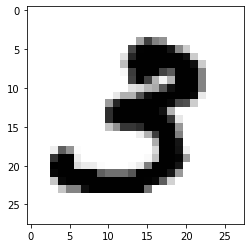

In [9]:
images, labels = next(iter(testLoader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Manual Test:")
print("============")
print("Predicted Digit =", probab.index(max(probab)))
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');


### CODE: Evaluate Network __(with whole test-set)__

In [10]:
print("Evaluate Trained Model:")
print("=======================")

testImagesCount = 0
correctPredictions = 0

for images, labels in testLoader:
  for idx in range(len(labels)):
    img = images[idx].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    predictedValue = probab.index(max(probab))
    currentValue = labels.numpy()[idx]
    
    correctPredictions += not (predictedValue - currentValue)
    testImagesCount += 1

print(f"Tested images: {testImagesCount}")
print(f"Correct predicted: {correctPredictions} / {testImagesCount}\n")
print(f"Accuracy: {round((correctPredictions/testImagesCount) * 100, 2)}%")

Evaluate Trained Model:
Tested images: 10000
Correct predicted: 9686 / 10000

Accuracy: 96.86%
